In [1]:
import pygsp.graphs
import pygsp.graphs.graph
import time
import networkx as nx
import pygsp
import numpy as np
import scipy.sparse as scp
import matplotlib.pyplot as plt
import logging

ModuleNotFoundError: No module named 'pygsp'

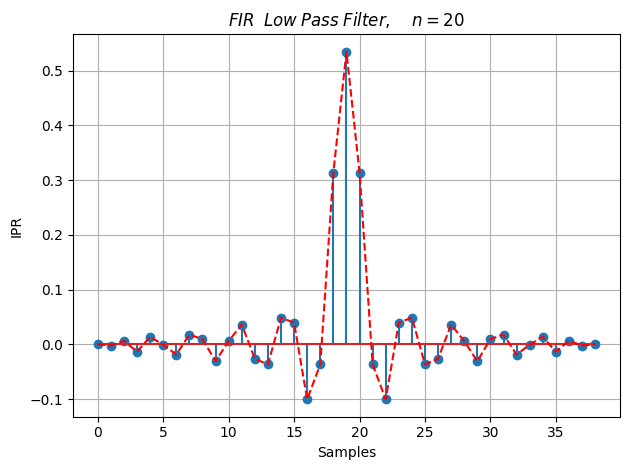

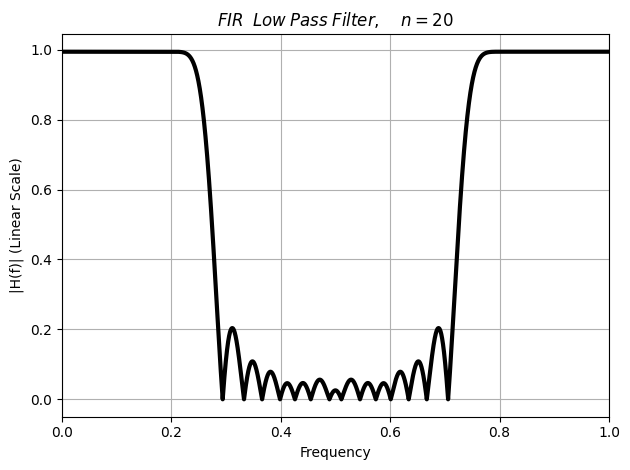

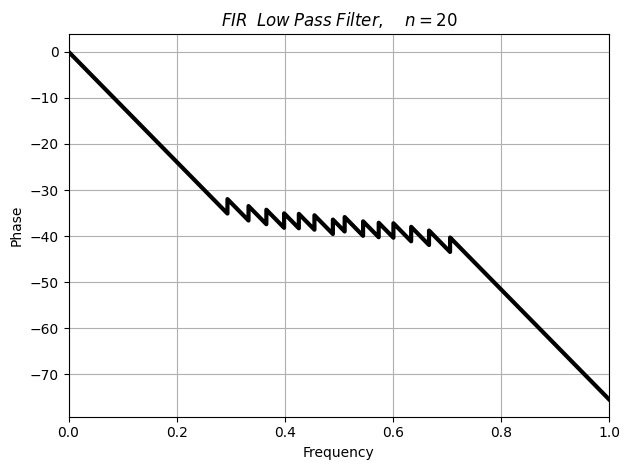

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import cvxpy as cp
import matplotlib
import warnings
warnings.filterwarnings('ignore')
class Params:
    N = 50000
    Fs = 1  # Normalized frequency, Fs = 1
    fp = 0.2  # Passband frequency
    fs = 0.3  # Stopband frequency
    filter_order = 20
    delta = 0.05  # Passband ripple
    attenuation = 0.1  # Stopband attenuation
    freq = np.linspace(0, 1, N)  # Normalized frequency range [0, 1]

    def __init__(self):
        pass

class Opt(Params):
    def __init__(self):
        super(Opt, self).__init__()
        self.utils()

    def utils(self):
        A = 2 * np.cos(2 * np.pi * Params.freq.reshape(-1, 1) * np.arange(0, Params.filter_order))
        index_p = np.where(Params.freq < Params.fp)[0].tolist()
        index_s = np.where((Params.fs < Params.freq))[0].tolist()
        A[:, 0] = 1
        self.Ap = A[index_p, :]
        self.As = A[index_s, :]

    def _cost(self, hp):
        cost = cp.max(cp.abs(self.As @ hp) - 10**(-Params.attenuation / 20))
        return cost

    def _constr(self, hp):
        constr = []
        constr += [10**(-Params.delta / 20) <= self.Ap @ hp]
        constr += [self.Ap @ hp <= 10**(Params.delta / 20)]
        return constr

    def _run(self):
        hp = cp.Variable(Params.filter_order)
        prob = cp.Problem(cp.Minimize(self._cost(hp)), self._constr(hp))
        prob.solve()
        return hp.value

class Filter(Params):
    def __init__(self):
        pass

    @staticmethod
    def impulse_response(h):
        h = np.hstack((h[:0:-1], h))
        return Filter.frequency_response(h)

    @staticmethod
    def frequency_response(h):
        H = np.fft.fft(h, Params.N)
        return h, H

class Display:
    def __init__(self, H, h, msg):
        self.msg = msg
        self.display_IPR(h)
        self.display_IPR_H(H)
        self.display_phase(H)

    def display_IPR(self, h):
        plt.figure()
        plt.stem(h)
        plt.plot(h, 'r--')
        plt.grid()
        plt.xlabel('Samples')
        plt.ylabel('IPR')
        plt.title(f'$FIR\;\;{msg}\; Pass\; Filter, \;\;\;\; n = {Params.filter_order}$')
        plt.tight_layout()
        plt.show()

    def display_IPR_H(self, H):
        H = abs(H)  # Linear scale
        plt.figure()
        plt.plot(Params.freq * Params.Fs, H, 'k', lw=3)  # Plot in linear scale
        plt.grid()
        plt.xlabel('Frequency')
        plt.ylabel('|H(f)| (Linear Scale)')  # Updated label to indicate linear scale
        plt.title(f'$FIR\;\;{msg}\; Pass\; Filter, \;\;\;\; n = {Params.filter_order}$')
        plt.xlim(0, Params.Fs)
        plt.tight_layout()
        plt.show()

    def display_phase(self, H):
        plt.figure()
        plt.plot(Params.freq * Params.Fs, np.unwrap(np.angle(H)), 'k', lw=3)
        plt.grid()
        plt.xlabel('Frequency')
        plt.ylabel('Phase')
        plt.title(f'$FIR\;\;{self.msg}\; Pass\; Filter, \;\;\;\; n = {Params.filter_order}$')
        plt.xlim(0, Params.Fs)
        plt.tight_layout()
        plt.show()


if __name__ == '__main__':
    msg = 'Low'
    Params()
    opt = Opt()
    h = opt._run()
    h, H = Filter.impulse_response(h)
    Display(H, h, msg)


# Q2)
## part 1


In [2]:
pip install cvxpy scipy


In [ ]:
import cvxpy as cp
import numpy as np
import time
import matplotlib.pyplot as plt

# Generate synthetic data for LASSO problem
def generate_data(n_samples=100, n_features=500, n_effective_features=10, noise=0.1):
    np.random.seed(3)

    A = np.random.randn(n_samples, n_features)
    x = np.zeros(n_features)
    effective_indices = np.random.choice(n_features, n_effective_features, replace=False)
    x[effective_indices] = np.random.randn(n_effective_features)

    b = A.dot(x) + noise * np.random.randn(n_samples)

    return A, b, x

In [ ]:
# LASSO solver using CVXPY
def solve_lasso(A, gamma, b):
    m, n = A.shape
    x = cp.Variable(n)
    obj = cp.Minimize(1/2 * cp.norm2(A @ x - b) + gamma * cp.norm1(x))
    prob = cp.Problem(obj)

    start_t = time.time()
    prob.solve()
    end_t = time.time()

    return x.value, -start_t + end_t, prob.value

## 1

In [9]:
import cvxpy as cp
import numpy as np
import time

# Define the LASSO problem
def lasso_cvxpy(A, b, gamma):
    n = A.shape[1]
    x = cp.Variable(n)

    # Define the loss function: 1/2 * ||Ax - b||^2 + gamma * ||x||_1
    objective = cp.Minimize(0.5 * cp.norm(A @ x - b, 'fro')**2 + gamma * cp.norm(x, 1))

    # Define the problem
    problem = cp.Problem(objective)

    # Solve the problem and time the execution
    start_time = time.time()
    problem.solve()
    end_time = time.time()

    # Return solution and execution time
    return x.value, end_time - start_time

# Test the implementation with different matrix dimensions
A_small = np.random.randn(100, 50)
b_small = np.random.randn(100)

A_large = np.random.randn(1000, 500)
b_large = np.random.randn(1000)

gamma = 0.1

# Solve the problem for small matrix
x_small, time_small = lasso_cvxpy(A_small, b_small, gamma)
print(f"Time for small problem: {time_small:.4f} seconds")

# Solve the problem for large matrix
x_large, time_large = lasso_cvxpy(A_large, b_large, gamma)
print(f"Time for large problem: {time_large:.4f} seconds")


Time for small problem: 0.0268 seconds
Time for large problem: 4.3890 seconds


# Compare results for part 1

In [12]:
# Run the LASSO solver for different matrix sizes and track results
def run_experiment(gamma=0.1, sample_sizes=[100, 200, 300, 500, 700], feature_sizes=[100, 200, 300, 500, 700]):
    results = {
        "sizes": [],
        "times": [],
        "residual_norms": [],
        "accuracy_norms": [],
        "objective_values": [],
    }

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            # Generate synthetic data
            A, b, x_true = generate_data(n_samples=n_samples, n_features=n_features)

            # Solve the LASSO problem
            x_lasso, t_lasso, prob_value = solve_lasso(A, gamma, b)

            # Compute residual and accuracy
            residual_norm = np.linalg.norm(A @ x_lasso - b, 2)
            accuracy_norm = np.linalg.norm(x_lasso - x_true, 2)

            # Store results for plotting
            results["sizes"].append((n_samples, n_features))
            results["times"].append(t_lasso)
            results["residual_norms"].append(residual_norm)
            results["accuracy_norms"].append(accuracy_norm)
            results["objective_values"].append(prob_value)

            print(f"Shape: ({n_samples}, {n_features})")
            print(f"LASSO time: {t_lasso:.4f}s")
            print(f"Objective value: {prob_value:.4f}")
            print(f"Residual norm (Ax - b): {residual_norm:.4f}")
            print(f"Accuracy norm (x_true - x_lasso): {accuracy_norm:.4f}")
            print("-" * 100)

    return results

# Run the experiment
gamma = 0.1
results = run_experiment(gamma=gamma)

Shape: (100, 100)
LASSO time: 0.0574s
Objective value: 0.7297
Residual norm (Ax - b): 0.3428
Accuracy norm (x_true - x_lasso): 0.1552
----------------------------------------------------------------------------------------------------
Shape: (100, 200)
LASSO time: 0.1509s
Objective value: 1.0194
Residual norm (Ax - b): 0.0000
Accuracy norm (x_true - x_lasso): 0.1266
----------------------------------------------------------------------------------------------------
Shape: (100, 300)
LASSO time: 0.2081s
Objective value: 0.9567
Residual norm (Ax - b): 0.0000
Accuracy norm (x_true - x_lasso): 0.1474
----------------------------------------------------------------------------------------------------
Shape: (100, 500)
LASSO time: 0.2517s
Objective value: 0.8803
Residual norm (Ax - b): 0.0000
Accuracy norm (x_true - x_lasso): 0.1446
----------------------------------------------------------------------------------------------------
Shape: (100, 700)
LASSO time: 0.2858s
Objective value: 0.522

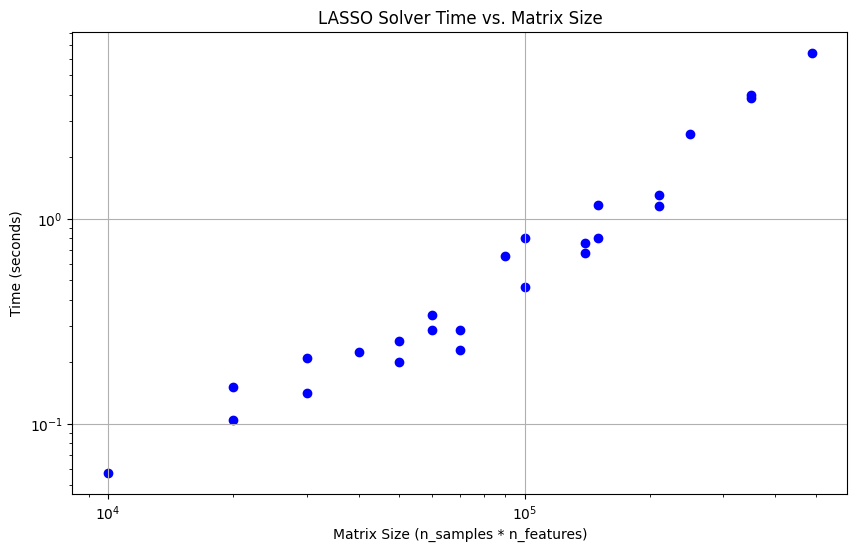

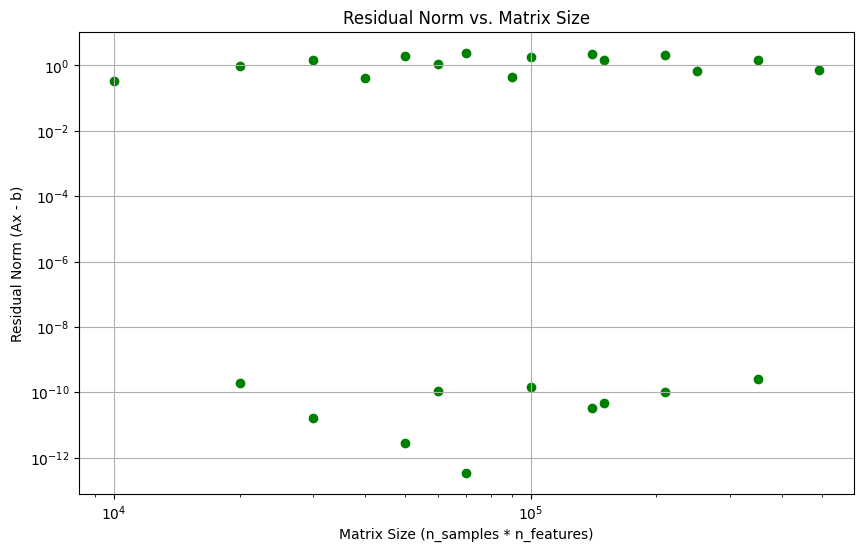

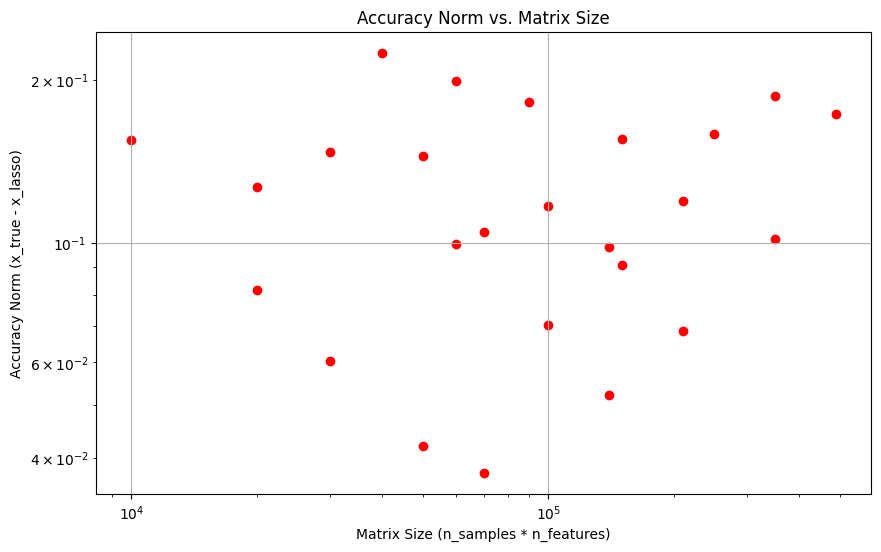

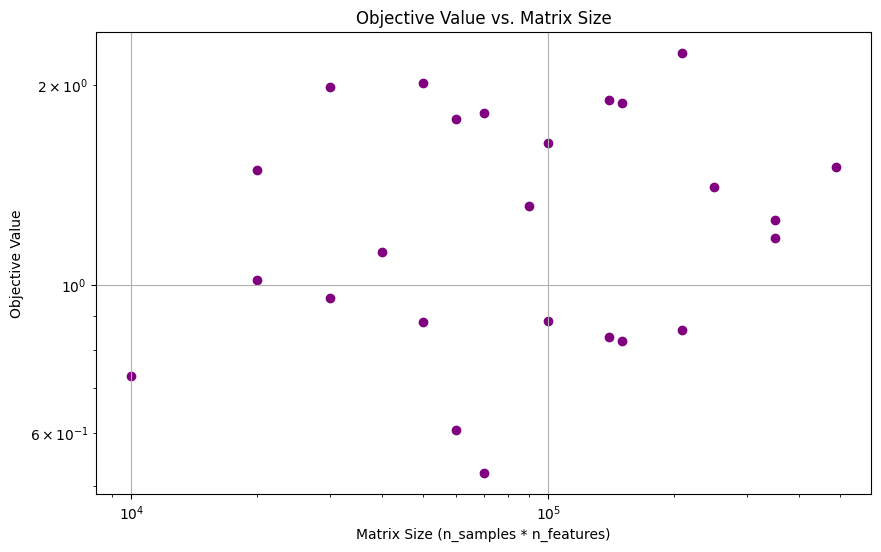

In [13]:
# Plot results
def plot_results(results):
    sizes = results["sizes"]
    times = results["times"]
    residual_norms = results["residual_norms"]
    accuracy_norms = results["accuracy_norms"]
    objective_values = results["objective_values"]

    # Plot time vs. matrix size (total number of elements in the matrix)
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], times, color="blue")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Time (seconds)")
    plt.title("LASSO Solver Time vs. Matrix Size")
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    # Plot residual norm vs. matrix size
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], residual_norms, color="green")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Residual Norm (Ax - b)")
    plt.title("Residual Norm vs. Matrix Size")
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    # Plot accuracy norm vs. matrix size
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], accuracy_norms, color="red")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Accuracy Norm (x_true - x_lasso)")
    plt.title("Accuracy Norm vs. Matrix Size")
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    # Plot objective value vs. matrix size
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], objective_values, color="purple")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Objective Value")
    plt.title("Objective Value vs. Matrix Size")
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

# Plot the results
plot_results(results)


# 2

In [17]:
import numpy as np
import time

# Soft thresholding operator for L1 regularization
def soft_thresholding(x, lambda_):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_, 0)

# Proximal Gradient Algorithm for LASSO
def proximal_gradient(A, b, gamma, max_iter=1000, lambda_=0.1, tol=1e-6):
    n = A.shape[1]
    x = np.zeros(n)
    for k in range(max_iter):
        grad = A.T @ (A @ x - b)
        x_new = soft_thresholding(x - grad / lambda_, gamma / lambda_)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x

# Testing with small and large matrix
def test_proximal_gradient(A, b, gamma, lambda_=0.1):
    start_time = time.time()
    x = proximal_gradient(A, b, gamma, lambda_=lambda_)
    end_time = time.time()
    return x, end_time - start_time

# Test with different dimensions
A_small = np.random.randn(100, 50)
b_small = np.random.randn(100)

A_large = np.random.randn(1000, 500)
b_large = np.random.randn(1000)

gamma = 0.1

# Solve for small matrix
x_small_pg, time_small_pg = test_proximal_gradient(A_small, b_small, gamma)
print(f"Time for proximal gradient (small problem): {time_small_pg:.4f} seconds")

# Solve for large matrix
x_large_pg, time_large_pg = test_proximal_gradient(A_large, b_large, gamma)
print(f"Time for proximal gradient (large problem): {time_large_pg:.4f} seconds")




<ipython-input-17-6d4f0577cfb1>:14: RuntimeWarning: overflow encountered in divide
  x_new = soft_thresholding(x - grad / lambda_, gamma / lambda_)
<ipython-input-17-6d4f0577cfb1>:13: RuntimeWarning: overflow encountered in matmul
  grad = A.T @ (A @ x - b)
<ipython-input-17-6d4f0577cfb1>:13: RuntimeWarning: invalid value encountered in matmul
  grad = A.T @ (A @ x - b)


Time for proximal gradient (small problem): 0.0228 seconds
Time for proximal gradient (large problem): 0.4606 seconds


# compare results 2

In [24]:

import numpy as np
import time
import matplotlib.pyplot as plt
import copy

# Soft thresholding operator (L1 regularization)
def soft_thresholding(y, lam):
    return np.sign(y) * np.maximum(np.abs(y) - lam, 0)

# Proximal gradient descent function
def proximal_gradient(A, b, gamma, step_size, max_iter=1e7, tol=1e-6):
    m, n = A.shape
    x = np.zeros(n)  # initialize x
    x_cop = copy.deepcopy(x)

    start_t = time.time()
    # Precompute the terms for efficiency
    AtA = A.T @ A
    Atb = A.T @ b

    for k in range(int(max_iter)):
        grad = AtA @ x_cop - Atb
        x_new = soft_thresholding(x_cop - step_size * grad, step_size * gamma)

        # Check for convergence based on the tolerance
        if np.linalg.norm(x_new - x_cop, 2) < tol:
            break

        x_cop = x_new
    end_t = time.time()

    print(f"Max iteration: {k} done for tol: {tol}")

    return x_cop, end_t - start_t

# Generate data for testing
def generate_data(n_samples=100, n_features=500, n_effective_features=10, noise=0.1):
    np.random.seed(3)

    A = np.random.randn(n_samples, n_features)
    x = np.zeros(n_features)
    effective_indices = np.random.choice(n_features, n_effective_features, replace=False)
    x[effective_indices] = np.random.randn(n_effective_features)

    b = A.dot(x) + noise * np.random.randn(n_samples)

    return A, b, x

# Experiment to run proximal gradient descent with varying sample and feature sizes
def run_experiment(gamma=0.1, sample_sizes=[100,110,120,130,140,150,160,170,180,190,
                                            200,220,240,260,280,300,330,360,390,440,
                                            470,500,550,600,650,700],
                              feature_sizes=[100,110,120,130,140,150,160,170,180,190,
                                             200,220,240,260,280,300,330,360,390,440,
                                             470,500,550,600,650,700]):
    results = {
        "sizes": [],
        "times": [],
        "residual_norms": [],
        "accuracy_norms": [],
    }

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            # Generate synthetic data
            A, b, x_true = generate_data(n_samples=n_samples, n_features=n_features)

            # Compute Lipschitz constant (largest eigenvalue of A.T @ A)
            L = np.linalg.norm(A.T @ A, 2)
            step_size = 1 / L  # step size for convergence

            # Run the proximal gradient method
            x_prox, time_prox = proximal_gradient(A, b, gamma, step_size)

            # Compute residual and accuracy
            residual_norm = np.linalg.norm(A @ x_prox - b, 2)
            accuracy_norm = np.linalg.norm(x_prox - x_true, 2)

            # Store results for plotting
            results["sizes"].append((n_samples, n_features))
            results["times"].append(time_prox)
            results["residual_norms"].append(residual_norm)
            results["accuracy_norms"].append(accuracy_norm)

            print(f"Shape: ({n_samples}, {n_features})")
            print(f"Proximal Gradient Time: {time_prox:.4f}s")
            print(f"Residual Norm (Ax - b): {residual_norm:.4f}")
            print(f"Accuracy Norm (x_true - x_prox): {accuracy_norm:.4f}")
            print("-" * 100)

    return results

# Run the experiment
gamma = 0.1
results = run_experiment(gamma=gamma)



Max iteration: 1260 done for tol: 1e-06
Shape: (100, 100)
Proximal Gradient Time: 0.0455s
Residual Norm (Ax - b): 0.3761
Accuracy Norm (x_true - x_prox): 0.1366
----------------------------------------------------------------------------------------------------
Max iteration: 1954 done for tol: 1e-06
Shape: (100, 110)
Proximal Gradient Time: 0.0595s
Residual Norm (Ax - b): 0.3384
Accuracy Norm (x_true - x_prox): 0.1518
----------------------------------------------------------------------------------------------------
Max iteration: 4264 done for tol: 1e-06
Shape: (100, 120)
Proximal Gradient Time: 0.1299s
Residual Norm (Ax - b): 0.3065
Accuracy Norm (x_true - x_prox): 0.1511
----------------------------------------------------------------------------------------------------
Max iteration: 4117 done for tol: 1e-06
Shape: (100, 130)
Proximal Gradient Time: 0.1823s
Residual Norm (Ax - b): 0.2061
Accuracy Norm (x_true - x_prox): 0.1245
-----------------------------------------------------

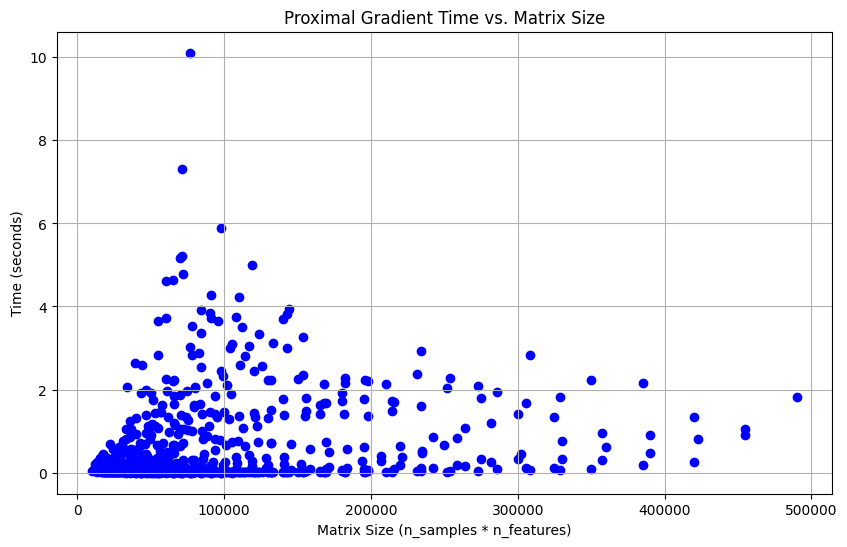

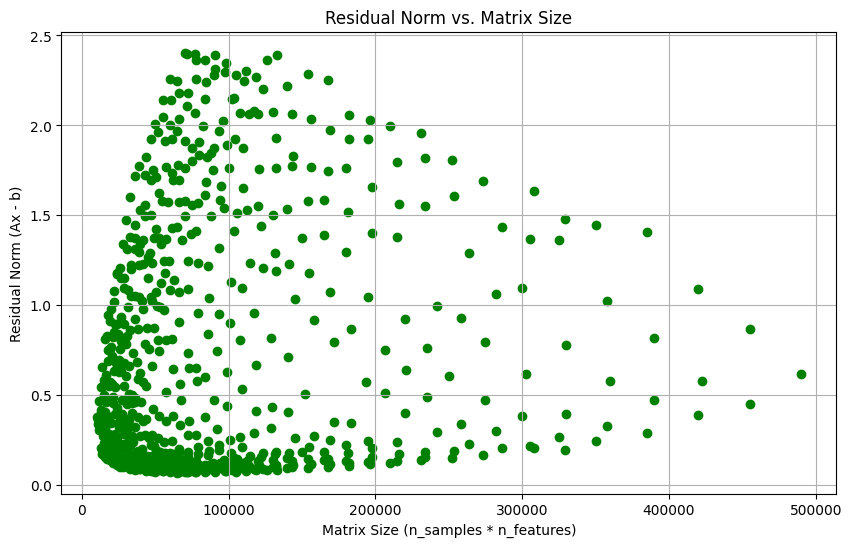

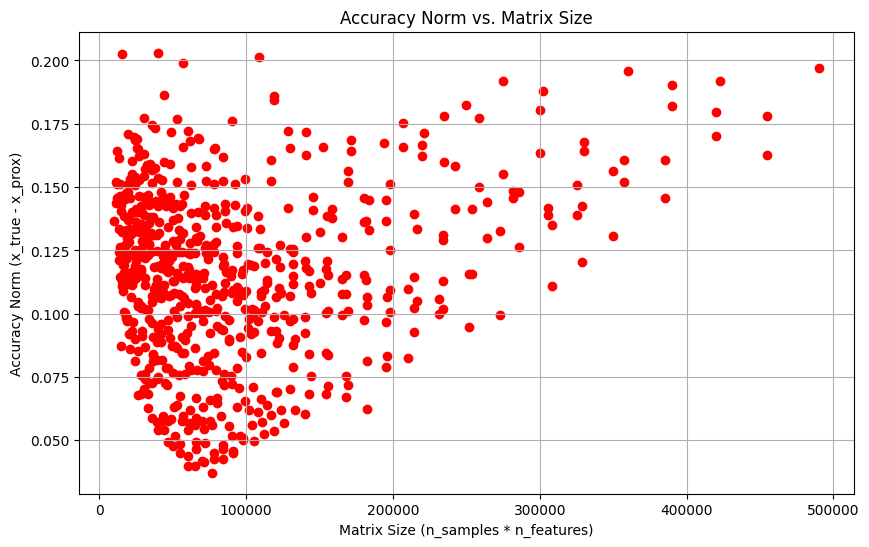

In [25]:
# Plot results
def plot_results(results):
    sizes = results["sizes"]
    times = results["times"]
    residual_norms = results["residual_norms"]
    accuracy_norms = results["accuracy_norms"]

    # Plot time vs. matrix size (total number of elements in the matrix)
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], times, color="blue")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Time (seconds)")
    plt.title("Proximal Gradient Time vs. Matrix Size")
    plt.grid(True)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

    # Plot residual norm vs. matrix size
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], residual_norms, color="green")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Residual Norm (Ax - b)")
    plt.title("Residual Norm vs. Matrix Size")
    plt.grid(True)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

    # Plot accuracy norm vs. matrix size
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], accuracy_norms, color="red")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Accuracy Norm (x_true - x_prox)")
    plt.title("Accuracy Norm vs. Matrix Size")
    plt.grid(True)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

# Plot the results
plot_results(results)

# 3

In [26]:
import numpy as np
import time

# Soft thresholding operator for L1 regularization
def soft_thresholding(x, lambda_):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_, 0)

# ADMM for LASSO
def admm_lasso(A, b, gamma, rho, max_iter=1000, tol=1e-6):
    n = A.shape[1]
    m = A.shape[0]
    x = np.zeros(n)
    y = np.zeros(n)
    mu = np.zeros(n)

    for k in range(max_iter):
        # Update x
        x_new = np.linalg.inv(rho * np.eye(n) + A.T @ A) @ (A.T @ b + rho * (y - mu))

        # Update y
        y_new = soft_thresholding(x_new + mu, gamma / rho)

        # Update mu
        mu = mu + (x_new - y_new)

        if np.linalg.norm(x_new - x) < tol and np.linalg.norm(y_new - y) < tol:
            break

        x, y = x_new, y_new

    return x_new

# Testing with small and large matrix
def test_admm(A, b, gamma, rho):
    start_time = time.time()
    x = admm_lasso(A, b, gamma, rho)
    end_time = time.time()
    return x, end_time - start_time

# Test with different dimensions and rho values
A_small = np.random.randn(100, 50)
b_small = np.random.randn(100)

A_large = np.random.randn(1000, 500)
b_large = np.random.randn(1000)

gamma = 0.1
rho_values = [1, 10, 100]

# Solve for small matrix with different rho
for rho in rho_values:
    x_small_admm, time_small_admm = test_admm(A_small, b_small, gamma, rho)
    print(f"Time for ADMM (small problem, rho={rho}): {time_small_admm:.4f} seconds")

# Solve for large matrix with different rho
for rho in rho_values:
    x_large_admm, time_large_admm = test_admm(A_large, b_large, gamma, rho)
    print(f"Time for ADMM (large problem, rho={rho}): {time_large_admm:.4f} seconds")


Time for ADMM (small problem, rho=1): 0.0425 seconds
Time for ADMM (small problem, rho=10): 0.0081 seconds
Time for ADMM (small problem, rho=100): 0.0215 seconds
Time for ADMM (large problem, rho=1): 8.5376 seconds
Time for ADMM (large problem, rho=10): 3.0071 seconds
Time for ADMM (large problem, rho=100): 1.0713 seconds


# compare results for part 3

In [27]:
import numpy as np
import time
import matplotlib.pyplot as plt
import copy

# Soft thresholding operator (L1 regularization)
def soft_thresholding(y, lam):
    return np.sign(y) * np.maximum(np.abs(y) - lam, 0)

# ADMM function
def admm(A, b, gamma, rho, max_iter=1e7, tol=1e-6):
    m, n = A.shape
    x = np.zeros(n)  # Primal variable
    y = np.zeros(n)  # Auxiliary variable
    mu = np.zeros(n)  # Dual variable

    start_t = time.time()
    rho_Atb = rho * A.T @ b
    L_inv = np.linalg.inv(rho * A.T @ A + np.eye(n))

    for k in range(int(max_iter)):
        x = L_inv @ (y - mu + rho_Atb)
        y_old = y
        y = soft_thresholding(x + mu, gamma / rho)
        mu += x - y

        pr_norm = np.linalg.norm(x - y, 2)  # Primal residual
        rs_norm = rho * np.linalg.norm(y - y_old, 2)  # Dual residual

        if pr_norm < tol and rs_norm < tol:
            break

    end_t = time.time()

    print(f"Max iteration: {k} done for tol: {tol}")

    return x, end_t - start_t

# Generate data for testing
def generate_data(n_samples=100, n_features=500, n_effective_features=10, noise=0.1):
    np.random.seed(3)

    A = np.random.randn(n_samples, n_features)
    x = np.zeros(n_features)
    effective_indices = np.random.choice(n_features, n_effective_features, replace=False)
    x[effective_indices] = np.random.randn(n_effective_features)

    b = A.dot(x) + noise * np.random.randn(n_samples)

    return A, b, x

# Experiment to run ADMM with varying sample and feature sizes and rho values
def run_admm_experiment(gamma=0.1, sample_sizes=[100,150,200,250,300,350,400,450,500,550,600,650,700], feature_sizes=[100,150,200,250,300,350,400,450,500,550,600,650,700], rho_values=[1, 2, 4, 8, 16, 32, 64]):
    admm_results = {
        "sizes": [],
        "times": [],
        "residual_norms": [],
        "accuracy_norms": [],
        "rhos": []
    }

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            # Generate synthetic data
            A, b, x_true = generate_data(n_samples=n_samples, n_features=n_features)

            # Run ADMM for each rho value
            for rho in rho_values:
                print(f"Shape: ({n_samples}, {n_features}), rho: {rho}")
                x_admm, time_admm = admm(A, b, gamma, rho)

                # Compute residual and accuracy
                residual_norm = np.linalg.norm(A @ x_admm - b, 2)
                accuracy_norm = np.linalg.norm(x_admm - x_true, 2)

                # Store results for plotting
                admm_results["sizes"].append((n_samples, n_features))
                admm_results["times"].append(time_admm)
                admm_results["residual_norms"].append(residual_norm)
                admm_results["accuracy_norms"].append(accuracy_norm)
                admm_results["rhos"].append(rho)

                print(f"ADMM Time: {time_admm:.4f}s")
                print(f"Residual Norm (Ax - b): {residual_norm:.4f}")
                print(f"Accuracy Norm (x_true - x_admm): {accuracy_norm:.4f}")
                print("-" * 100)

    return admm_results

# Run the ADMM experiment
gamma = 0.1
admm_results = run_admm_experiment(gamma=gamma)



Streaming output truncated to the last 5000 lines.
Accuracy Norm (x_true - x_admm): 0.1266
----------------------------------------------------------------------------------------------------
Shape: (250, 650), rho: 1
Max iteration: 2995 done for tol: 1e-06
ADMM Time: 0.7203s
Residual Norm (Ax - b): 0.1070
Accuracy Norm (x_true - x_admm): 0.0907
----------------------------------------------------------------------------------------------------
Shape: (250, 650), rho: 2
Max iteration: 4032 done for tol: 1e-06
ADMM Time: 0.7653s
Residual Norm (Ax - b): 0.0283
Accuracy Norm (x_true - x_admm): 0.0954
----------------------------------------------------------------------------------------------------
Shape: (250, 650), rho: 4
Max iteration: 8892 done for tol: 1e-06
ADMM Time: 1.7587s
Residual Norm (Ax - b): 0.0072
Accuracy Norm (x_true - x_admm): 0.0966
----------------------------------------------------------------------------------------------------
Shape: (250, 650), rho: 8
Max iterati

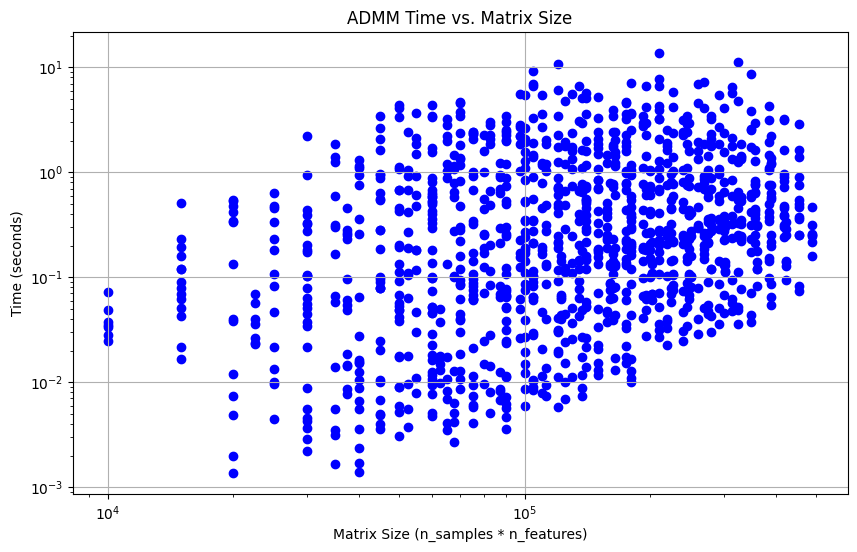

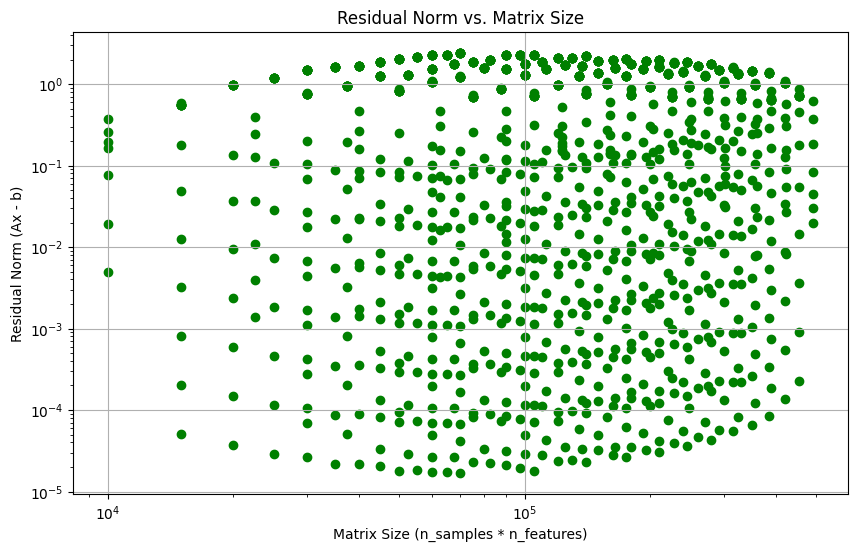

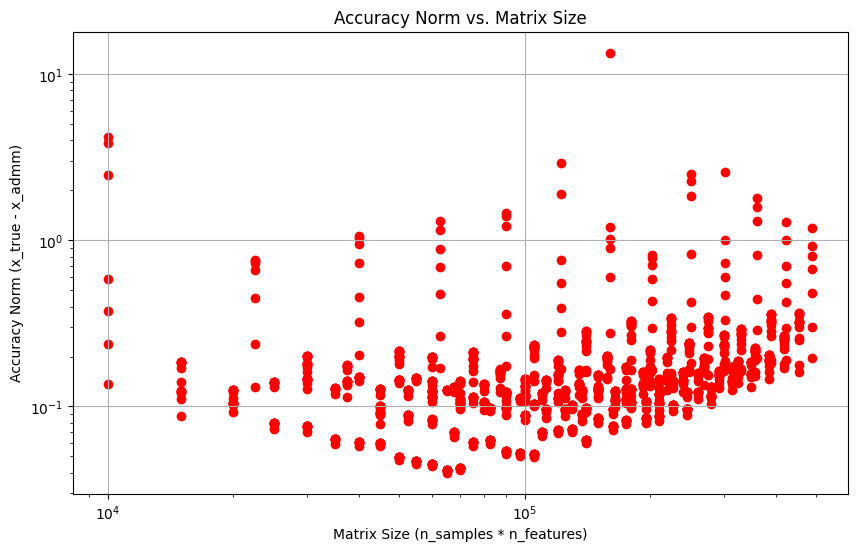

In [29]:
# Plot results
def plot_admm_results(admm_results):
    sizes = admm_results["sizes"]
    times = admm_results["times"]
    residual_norms = admm_results["residual_norms"]
    accuracy_norms = admm_results["accuracy_norms"]
    rhos = admm_results["rhos"]

    # Plot time vs. matrix size (total number of elements in the matrix)
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], times, color="blue")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Time (seconds)")
    plt.title("ADMM Time vs. Matrix Size")
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    # Plot residual norm vs. matrix size
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], residual_norms, color="green")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Residual Norm (Ax - b)")
    plt.title("Residual Norm vs. Matrix Size")
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    # Plot accuracy norm vs. matrix size
    plt.figure(figsize=(10, 6))
    plt.scatter([size[0] * size[1] for size in sizes], accuracy_norms, color="red")
    plt.xlabel("Matrix Size (n_samples * n_features)")
    plt.ylabel("Accuracy Norm (x_true - x_admm)")
    plt.title("Accuracy Norm vs. Matrix Size")
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    # Plot time vs. rho for different matrix sizes
    #plt.figure(figsize=(10, 6))
    #for i, (n_samples, n_features) in enumerate(sizes):
    #    plt.plot(rhos, [admm_results["times"][i + j * len(rhos)] for j in range(len(rhos))], label=f"({n_samples}, {n_features})")


# Plot the results
plot_admm_results(admm_results)

# Q2 part 2


In [31]:
pip install pygsp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.0 MB/s eta 0:00:00


ADMM finished in 149 iterations, time = 0.016 s.
ADMM finished in 246 iterations, time = 0.042 s.
ADMM finished in 489 iterations, time = 0.525 s.


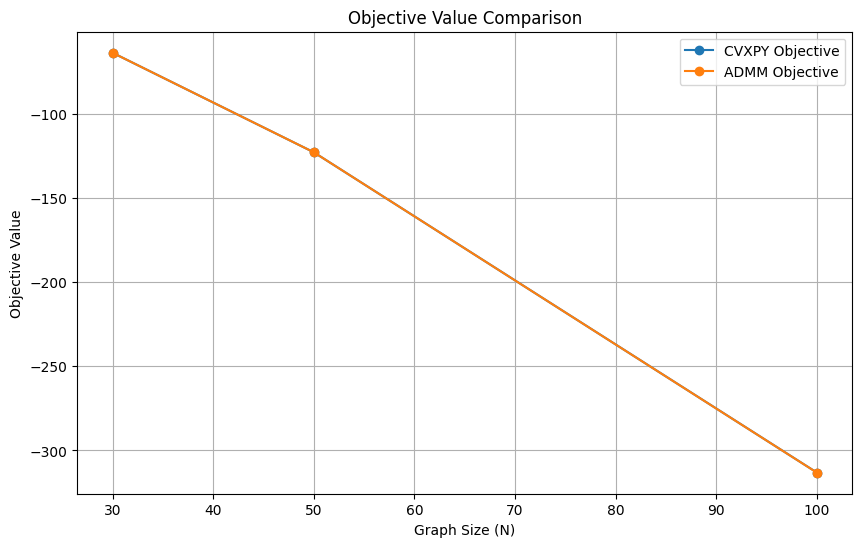

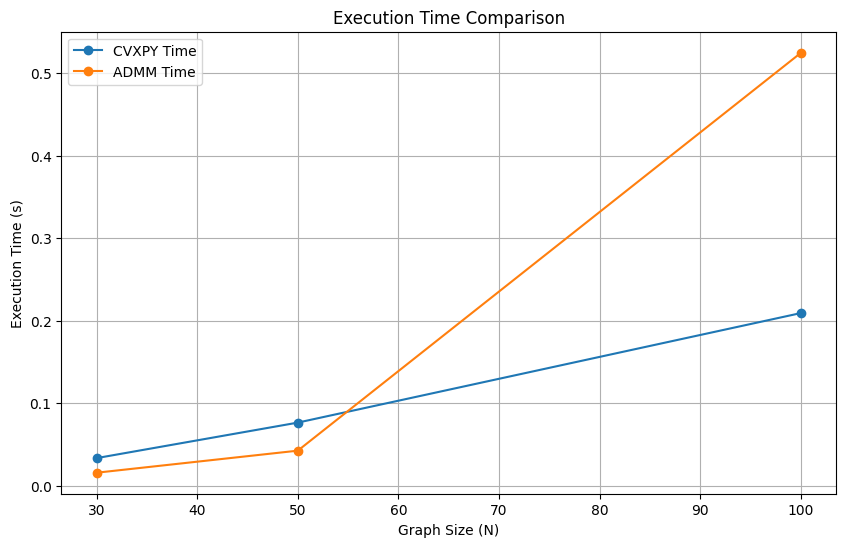

In [32]:
import numpy as np
import time
import cvxpy as cp
import matplotlib.pyplot as plt
from pygsp import graphs
import random
import logging


# Helper functions for graph creation
def Sensor(N):
    random.seed(42)
    np.random.seed(42)
    logging.disable(logging.CRITICAL)
    G = graphs.Sensor(N, seed=42)
    logging.disable(logging.NOTSET)
    return G


def Erdos(N):
    random.seed(42)
    np.random.seed(42)
    logging.disable(logging.CRITICAL)
    G = graphs.ErdosRenyi(N, p=3/N, seed=42)
    logging.disable(logging.NOTSET)
    return G


# Graph frequency filters
def general_filter(graph, filter):
    U_selected = graph.U[:, 1:]
    arr = np.random.normal(0, 1, size=(graph.N-1,)) * filter(graph.e[1:] / np.max(graph.e))
    xi = U_selected @ arr
    return xi


def Lin_Gaussian(lambdas):
    return np.reciprocal(np.sqrt(lambdas), out=np.zeros_like(lambdas), where=lambdas != 0)


def build_problem_data(G, x, beta=0.1):
    N = G.N
    upper_pairs = [(i, j) for i in range(N) for j in range(i + 1, N)]
    z = np.array([(x[i] - x[j])**2 for i, j in upper_pairs])

    alpha = np.ones(N)
    M = len(upper_pairs)
    Q = np.zeros((N, M))
    for k, (i, j) in enumerate(upper_pairs):
        Q[i, k] = 1
        Q[j, k] = 1

    return z, alpha, Q


def example_setup(N=30, alp=1):
    G = Sensor(N)  # or Erdos(N)
    G.compute_fourier_basis()
    x = general_filter(G, Lin_Gaussian)
    z, alpha, Q = build_problem_data(G, x, beta=0.1)
    return z, alpha * alp, Q


# CVXPY Solver
def solve_cvxpy(z, alpha, Q, beta=0.1):
    M = len(z)
    N = len(alpha)
    w_var = cp.Variable(M, nonneg=True)
    epsilon = 1e-6
    Qw = Q @ w_var
    obj = 2 * z @ w_var - alpha @ cp.log(Qw + epsilon) + beta * cp.norm2(w_var)**2

    constraints = [Qw >= epsilon]
    problem = cp.Problem(cp.Minimize(obj), constraints)

    start_time = time.time()
    problem.solve(solver=cp.SCS)
    end_time = time.time()

    return w_var.value, problem.value, end_time - start_time


# ADMM Solver
def admm_graph_learning(z, alpha, Q, beta=0.1, max_iter=5000, tol=1e-3, tau1=1e-3, tau2=1e-3, t=1e-3, verbose=True):
    m = len(z)
    n = len(alpha)

    start_time = time.time()

    w_k = np.zeros(m)
    v_k = np.full(n, 1)
    lam_k = np.zeros(n)
    QT = Q.T
    for k in range(max_iter):
        tmp = (Q @ w_k) - v_k - (lam_k / t)
        w_tilde = (w_k - tau1 * t * (QT @ tmp) - 2 * tau1 * z) / (2 * tau1 * beta + 1)
        w_next = np.maximum(w_tilde, 0)
        Qw_next = Q @ w_next

        v_tilde = (1 - tau2*t)*v_k + tau2*t*Qw_next - tau2*lam_k
        inside_sqrt = v_tilde**2 + 4 * alpha * tau2
        v_next = (v_tilde + np.sqrt(inside_sqrt)) / 2
        lam_next = lam_k - t * (Qw_next - v_next)

        r_d = np.linalg.norm((Q @ w_k) - v_k, 2)
        r_p = t * np.linalg.norm(QT @ (v_next - v_k), 2)
        w_k, v_k, lam_k = w_next, v_next, lam_next

        if r_d < tol and r_p < tol:
            break

    end_time = time.time()
    final_obj = (2.0 * z.dot(w_k) + beta * np.sum(w_k**2) - alpha.dot(np.log(v_k + 1e-18)))

    if verbose:
        print(f"ADMM finished in {k+1} iterations, time = {end_time - start_time:.3f} s.")
    return w_k, v_k, lam_k, final_obj, end_time - start_time


# Run experiments
N_values = [30, 50, 100]
results = []

for N in N_values:
    z, alpha, Q = example_setup(N=N, alp=2)
    beta = 0.25

    w_opt, obj_val_cvxpy, time_cvxpy = solve_cvxpy(z, alpha, Q, beta)
    t = 1 / (2 * N)
    tau1 = 1 / (2 * t * (N - 1))
    tau2 = 1 / t

    w_admm, _, _, obj_val_admm, time_admm = admm_graph_learning(
        z, alpha, Q, beta=beta, tau1=tau1, tau2=tau2, t=t)

    results.append((N, obj_val_cvxpy, obj_val_admm, time_cvxpy, time_admm))


# Visualization
N_values, obj_cvxpy, obj_admm, times_cvxpy, times_admm = zip(*results)

# Objective Value Comparison
plt.figure(figsize=(10, 6))
plt.plot(N_values, obj_cvxpy, label="CVXPY Objective", marker='o')
plt.plot(N_values, obj_admm, label="ADMM Objective", marker='o')
plt.xlabel("Graph Size (N)")
plt.ylabel("Objective Value")
plt.title("Objective Value Comparison")
plt.legend()
plt.grid()
plt.show()

# Execution Time Comparison
plt.figure(figsize=(10, 6))
plt.plot(N_values, times_cvxpy, label="CVXPY Time", marker='o')
plt.plot(N_values, times_admm, label="ADMM Time", marker='o')
plt.xlabel("Graph Size (N)")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time Comparison")
plt.legend()
plt.grid()
plt.show()


In [33]:
import numpy as np
import time
import cvxpy as cp
from pygsp import graphs

# Helper function: Create graph and generate data
def setup_graph_data(N, beta=0.1, alp=1):
    np.random.seed(42)
    G = graphs.Sensor(N)  # Can also use ErdosRenyi for variety
    G.compute_fourier_basis()

    # Generate signal using Gaussian kernel on graph frequencies
    x = G.U[:, 1:] @ (np.random.normal(0, 1, size=N - 1) * np.reciprocal(np.sqrt(G.e[1:])))

    # Build problem data
    upper_pairs = [(i, j) for i in range(N) for j in range(i + 1, N)]
    z = np.array([(x[i] - x[j]) ** 2 for i, j in upper_pairs])
    alpha = np.ones(N) * alp
    Q = np.zeros((N, len(upper_pairs)))
    for k, (i, j) in enumerate(upper_pairs):
        Q[i, k] = Q[j, k] = 1

    return G, z, alpha, Q

# CVXPY Implementation
def solve_with_cvxpy(z, alpha, Q, beta=0.1):
    M = len(z)
    N = len(alpha)
    w = cp.Variable(M, nonneg=True)
    epsilon = 1e-6
    Qw = Q @ w
    obj = 2 * z @ w - alpha @ cp.log(Qw + epsilon) + beta * cp.norm2(w)**2
    problem = cp.Problem(cp.Minimize(obj), [Qw >= epsilon])

    start_time = time.time()
    problem.solve(solver=cp.SCS)
    elapsed_time = time.time() - start_time

    return w.value, problem.value, elapsed_time

# ADMM Implementation
def admm_solver(z, alpha, Q, beta=0.1, max_iter=5000, tol=1e-3, tau1=1e-3, tau2=1e-3, t=1e-3):
    M, N = len(z), len(alpha)
    w = np.zeros(M)
    v = np.ones(N)
    lam = np.zeros(N)

    Q_T = Q.T

    for _ in range(max_iter):
        # Update `w`
        temp = Q @ w - v - lam / t
        w_tilde = (w - tau1 * t * Q_T @ temp - 2 * tau1 * z) / (2 * tau1 * beta + 1)
        w = np.maximum(w_tilde, 0)

        # Update `v`
        Qw = Q @ w
        v_tilde = (1 - tau2 * t) * v + tau2 * t * Qw - tau2 * lam
        v = (v_tilde + np.sqrt(v_tilde**2 + 4 * alpha * tau2)) / 2

        # Update Lagrange multipliers
        lam -= t * (Qw - v)

        # Convergence check
        if np.linalg.norm(Qw - v) < tol:
            break

    final_obj = 2 * z.dot(w) + beta * np.sum(w**2) - alpha.dot(np.log(v + 1e-18))
    return w, v, lam, final_obj

# Evaluation for N = 30 and N = 100
def evaluate(N_values, beta=0.1, alp=1):
    results = []

    for N in N_values:
        G, z, alpha, Q = setup_graph_data(N, beta, alp)

        # Solve using CVXPY
        _, obj_cvxpy, time_cvxpy = solve_with_cvxpy(z, alpha, Q, beta)

        # Solve using ADMM
        tau1 = tau2 = 1 / (2 * N)
        t = 1 / (2 * N)
        _, _, _, obj_admm = admm_solver(z, alpha, Q, beta, tau1=tau1, tau2=tau2, t=t)

        # Record results
        results.append({
            "N": N,
            "cvxpy_time": time_cvxpy,
            "admm_obj": obj_admm,
            "cvxpy_obj": obj_cvxpy,
        })

    return results

# Run Evaluation
N_values = [30, 100]
results = evaluate(N_values)

# Display Results
for res in results:
    print(f"Graph Size (N): {res['N']}")
    print(f"CVXPY Objective: {res['cvxpy_obj']:.4f}, Time: {res['cvxpy_time']:.4f} s")
    print(f"ADMM Objective: {res['admm_obj']:.4f}")
    print("-" * 40)


Graph Size (N): 30
CVXPY Objective: -42.9162, Time: 0.0253 s
ADMM Objective: -42.3750
----------------------------------------
Graph Size (N): 100
CVXPY Objective: -197.1676, Time: 0.2036 s
ADMM Objective: -162.3289
----------------------------------------


In [36]:
import numpy as np
import time

def admm_solver(z, alpha, Q, beta=0.1, max_iter=5000, tol=1e-3, tau1=1e-3, tau2=1e-3, t=1e-3):
    """
    Alternating Direction Method of Multipliers (ADMM) algorithm.

    Parameters:
    - z: Array of data.
    - alpha: Array of alpha parameters.
    - Q: Constraint matrix.
    - beta: Regularization parameter.
    - max_iter: Maximum number of iterations.
    - tol: Convergence tolerance.
    - tau1, tau2, t: Step-size parameters.

    Returns:
    - w: Final value of w.
    - v: Final value of v.
    - lam: Final Lagrange multipliers.
    - final_obj: Final objective value.
    """
    M, N = len(z), len(alpha)  # Dimensions
    w = np.zeros(M)  # Initialize w
    v = np.ones(N)   # Initialize v
    lam = np.zeros(N)  # Initialize Lagrange multipliers

    Q_T = Q.T  # Transpose of Q for efficient computation

    for iteration in range(max_iter):
        # Update w using the proximal operator
        temp = Q @ w - v - lam / t
        w_tilde = (w - tau1 * t * Q_T @ temp - 2 * tau1 * z) / (2 * tau1 * beta + 1)
        w = np.maximum(w_tilde, 0)  # Ensure non-negativity

        # Update v using the closed-form solution
        Qw = Q @ w
        v_tilde = (1 - tau2 * t) * v + tau2 * t * Qw - tau2 * lam
        v = (v_tilde + np.sqrt(v_tilde**2 + 4 * alpha * tau2)) / 2

        # Update Lagrange multipliers
        lam -= t * (Qw - v)

        # Convergence check
        if np.linalg.norm(Qw - v) < tol:
            print(f"Converged in {iteration + 1} iterations")
            break

    # Compute the final objective value
    final_obj = 2 * z.dot(w) + beta * np.sum(w**2) - alpha.dot(np.log(v + 1e-18))
    return w, v, lam, final_obj


In [37]:
def evaluate_admm(N_values, beta=0.1, alp=1):
    """
    Evaluate ADMM performance for different graph sizes.

    Parameters:
    - N_values: List of graph sizes (number of vertices).
    - beta: Regularization parameter.
    - alp: Scalar multiplier for alpha values.

    Returns:
    - Results dictionary with time consumption and objectives.
    """
    results = []
    for N in N_values:
        # Generate graph data
        G, z, alpha, Q = setup_graph_data(N, beta, alp)

        # Evaluate ADMM
        tau1, tau2, t = 1 / (2 * N), 1 / (2 * N), 1 / (2 * N)
        start_time = time.time()
        w, v, lam, obj_admm = admm_solver(z, alpha, Q, beta, tau1=tau1, tau2=tau2, t=t)
        elapsed_time = time.time() - start_time

        # Record results
        results.append({
            "N": N,
            "admm_time": elapsed_time,
            "admm_obj": obj_admm,
        })

    return results

# Run evaluation for graph sizes N = 30 and N = 100
N_values = [30, 100]
admm_results = evaluate_admm(N_values)

# Display results
for res in admm_results:
    print(f"Graph Size (N): {res['N']}")
    print(f"ADMM Objective: {res['admm_obj']:.4f}")
    print(f"ADMM Time: {res['admm_time']:.4f} seconds")
    print("-" * 40)


Converged in 4328 iterations
Graph Size (N): 30
ADMM Objective: -45.5863
ADMM Time: 0.9946 seconds
----------------------------------------
Graph Size (N): 100
ADMM Objective: -167.2584
ADMM Time: 5.9231 seconds
----------------------------------------


In [ ]:
import matplotlib.pyplot as plt

def evaluate_admm_multiple_trials(N_values, num_trials=5, beta=0.1, alp=1):
    """
    Evaluate ADMM performance over multiple trials for each graph size.

    Parameters:
    - N_values: List of graph sizes (number of vertices).
    - num_trials: Number of trials to average results.
    - beta: Regularization parameter.
    - alp: Scalar multiplier for alpha values.

    Returns:
    - Results dictionary with average times and objectives.
    """
    results = []

    for N in N_values:
        times = []
        objectives = []

        for trial in range(num_trials):
            # Generate graph data
            G, z, alpha, Q = setup_graph_data(N, beta, alp)

            # Evaluate ADMM
            tau1, tau2, t = 1 / (2 * N), 1 / (2 * N), 1 / (2 * N)
            start_time = time.time()
            w, v, lam, obj_admm = admm_solver(z, alpha, Q, beta, tau1=tau1, tau2=tau2, t=t)
            elapsed_time = time.time() - start_time

            # Record trial results
            times.append(elapsed_time)
            objectives.append(obj_admm)

        # Compute average results
        avg_time = np.mean(times)
        avg_objective = np.mean(objectives)
        results.append({
            "N": N,
            "avg_time": avg_time,
            "avg_obj": avg_objective,
        })

    return results

# Plotting Function
def plot_results(results):
    """
    Plot computation time and objective values for ADMM results.

    Parameters:
    - results: Results dictionary from evaluation function.
    """
    Ns = [res["N"] for res in results]
    times = [res["avg_time"] for res in results]
    objectives = [res["avg_obj"] for res in results]

    # Plot Computation Time
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(Ns, times, marker='o', label="ADMM Time")
    plt.title("Computation Time vs. Graph Size")
    plt.xlabel("Graph Size (N)")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()

    # Plot Objective Values
    plt.subplot(1, 2, 2)
    plt.plot(Ns, objectives, marker='o', color='orange', label="Objective Value")
    plt.title("Objective Value vs. Graph Size")
    plt.xlabel("Graph Size (N)")
    plt.ylabel("Objective Value")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluate and Plot Results
N_values = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
num_trials = 10  # Number of trials per graph size
admm_results = evaluate_admm_multiple_trials(N_values, num_trials=num_trials)
plot_results(admm_results)


Converged in 856 iterations
Converged in 942 iterations
Converged in 946 iterations
Converged in 895 iterations
Converged in 782 iterations
Converged in 826 iterations
Converged in 802 iterations
Converged in 881 iterations
Converged in 797 iterations
Converged in 855 iterations
Converged in 2389 iterations
Converged in 2447 iterations
Converged in 2377 iterations
Converged in 2381 iterations
Converged in 2279 iterations
Converged in 2386 iterations
Converged in 2393 iterations
Converged in 2296 iterations
Converged in 2483 iterations
Converged in 2385 iterations
Converged in 4218 iterations
Converged in 4164 iterations
Converged in 4108 iterations
Converged in 4218 iterations
Converged in 4226 iterations
Converged in 4124 iterations
Converged in 3953 iterations
Converged in 3988 iterations
Converged in 4471 iterations
Converged in 3976 iterations


## 1

In [ ]:
def generate_data(n_samples=100, n_features=500, n_effective_features=10, noise=0.1):

    np.random.seed(3)

    X = np.random.randn(n_samples, n_features)

    beta_true = np.zeros(n_features)
    effective_indices = np.random.choice(n_features, n_effective_features, replace=False)
    beta_true[effective_indices] = np.random.randn(n_effective_features)

    y = X.dot(beta_true) + noise * np.random.randn(n_samples)

    return X, y, beta_true

## Helper functions for part 3

In [ ]:
'''Helper functions for graph creation.
Note: You do not need to use both graph types for the analysis.'''


def Sensor(N):
    logging.disable(logging.CRITICAL)
    G=pygsp.graphs.Sensor(N)
    logging.disable(logging.NOTSET)
    return G

def Erdos(N):
    logging.disable(logging.CRITICAL)
    G=pygsp.graphs.ErdosRenyi(N,p=3/N)
    logging.disable(logging.NOTSET)
    return G

In [ ]:
'''Graph frequency filters for creating a single random smooth signal. You can change the functions, but the filter type ( 1\sqrt(lambda), lambda!=0 )
must remain the same.'''

def general_filter(graph, filter):
    '''Return unnormalized signal for given graph'''
    '''Uses normalized lambdas (/lambda max)'''
    U_selected=graph.U[:,1:]
    arr = np.random.normal(0, 1, size=(graph.N-1,))*filter(graph.e[1:]/np.max(graph.e))
    xi=U_selected@arr
    return xi

def Lin_Gaussian(lambdas):
    return np.reciprocal(np.sqrt(lambdas), out=np.zeros_like(lambdas), where=lambdas!=0)